<a href="https://colab.research.google.com/github/MeidanGR/SpeechEmotionRecognition_Realtime/blob/main/1_preprocess_for_one_audiofile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Speech Emotion Recognition (Classification) in real-time using Deep LSTM layers**
### ***Data preprocess representation for a single audio file***
---

### Final project (B.Sc. requirement)  
Development by **Meidan Greenberg & Linoy Hadad.**

Instructor: **Dr. Dima Alberg**

Industial Engineering and Management dept.

SCE Collage, Israel.





# **LIBRARIES & GOOGLE AUTH**

In [44]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [45]:
%%capture
!pip install pydub
!pip install noisereduce

In [46]:
%%capture
import os
import numpy as np

from pydub import AudioSegment, effects
import librosa
import noisereduce as nr

import matplotlib.pyplot as plt
from librosa import display
import IPython.display as ipd

# **DATA PREPROCESS REPRESENTATION**
This notebook present the data preprocessing for a single audio file.
The preprocess is described in the following diagram:
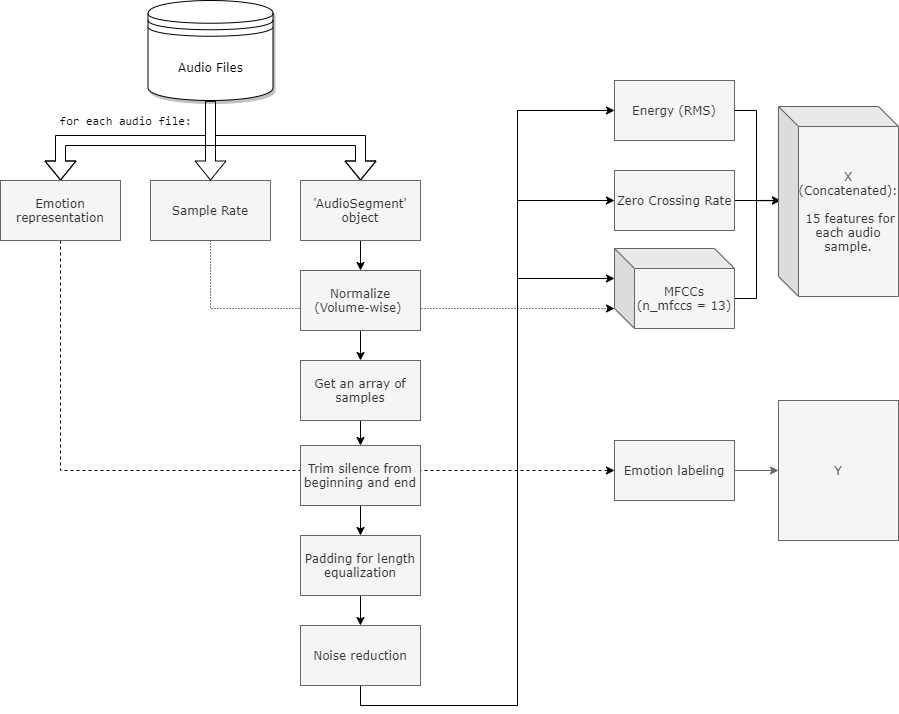

## **Diagram Explanation**
In general, The following data is extracted from each audio file:
1.   **Emotion representation**

    *   RAVDESS: The filename contains a number that represents an emotion, e.g. 03 is happy.
    *   TESS: The filename contains a direct representation of an emotion, e.g 'happy'.


2.   **Sample Rate**: number of audio samples per second. RAVDESS database was recorded in 48kHz, and the TESS database was recorded in 22.5kHz.

3. **The audio** is processed in the following order:


*   'AudioSegment' instance: The audio is loaded to an object by the library 'AudioSegment'.
*   Normalization: Each 'AudioSegment' object is normalized to + 5.0 dBFS.

*   Transforming the object to an array of samples is crucial for the rest of the preprocessing.
*   Trimming the silence in the beginning and the end, to get rid of unnecessary data.
*   Padding every audio file to the same length, for length equalization.
*   Noise reduction is being performed.
---


## **Audio preprocess for a single file**

In [48]:
# Define file path for a single file.
path = '/content/drive/My Drive/AudioFiles/RAVDESS/Actor_14/03-01-01-01-01-01-14.wav'

In [75]:
# Define file path for a single file.
RAVDESS = '/content/drive/My Drive/AudioFiles/RAVDESS/'

In [76]:
import os

# Define the path
#RAVDESS_PATH = "C:/Users/CHANUL/Downloads/archive/audio_speech_actors_01-24/Actor_01/"

# List files in the directory
files = os.listdir(RAVDESS)

# Print the list of files
print(files)


['Actor_02', '.ipynb_checkpoints', 'Actor_01', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [77]:
# define the attribute of the file
# 01 = netural, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
path_list = []
gender = []
emotion_list = []
emotion = {
    '03' : 'happy',
    '01' : 'neutral',
    '02' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fearful',
    '07' : 'disgust',
    '08' : 'surprised'
}
# The input file is in the f

In [78]:
# The input file is in the format one is the file name and other
# is the extension of the file
# the goal is to extract the emotion
'03-01-08-01-01-01-02.wav'.split('.')[0].split('-')[2]

'08'

In [79]:
# append the values of files, gender and emotion
for directory in os.listdir(RAVDESS):
    # reading the data from the actors file
    actor = os.listdir(os.path.join(RAVDESS, directory))

    # read the audio files actor file
    for file in actor:
        part = file.split('.')[0]
        # get the key of the emotion and match with the emotion dictionary
        key = part.split('-')[2]
#         print(key)
        if key in emotion:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{file}")
            gender.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion[key])

In [71]:
import pandas as pd

In [80]:
# make the dataframe of the lists
df = pd.DataFrame({
    'path' : path_list,
    'gender' : gender,
    'emotion' : emotion_list
})

# print the 5 rows of the data
df.head()

path  gender    emotion
0  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female    neutral
1  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised
2  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised
3  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised
4  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised

In [81]:
# Make the dataframe of the lists
df = pd.DataFrame({
    'path' : path_list,
    'gender' : gender,
    'emotion' : emotion_list
})

# Rename the first column to 'File_name'
df = df.rename(columns={df.columns[0]: 'File_Name'})

# Print the first 5 rows of the data
df.head()


File_Name  gender    emotion
0  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female    neutral
1  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised
2  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised
3  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised
4  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised

In [ ]:
%whos


Variable           Type         Data/Info
-----------------------------------------
AudioSegment       type         <class 'pydub.audio_segment.AudioSegment'>
RAVDESS            str          /content/drive/My Drive/AudioFiles/RAVDESS/
RAVDESS_PATH       str          C:/Users/CHANUL/Downloads<...>ch_actors_01-24/Actor_01/
actor              list         n=47
df                 DataFrame                             <...>\n[1340 rows x 4 columns]
directory          str          Actor_24
display            module       <module 'librosa.display'<...>ages/librosa/display.py'>
drive              module       <module 'google.colab.dri<...>s/google/colab/drive.py'>
effects            module       <module 'pydub.effects' f<...>ckages/pydub/effects.py'>
emotion            dict         n=8
emotion_list       list         n=1340
extract_keywords   function     <function extract_keywords at 0x7948365b24d0>
file               str          03-01-05-02-02-01-24.wav
files              list         n=25


In [ ]:
!pip install SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 25.5 MB/s eta 0:00:00


In [82]:
import pandas as pd
import speech_recognition as sr

# Load the RAVDESS dataset into a DataFrame
df = df

# Function to transcribe audio file to text
def transcribe_audio(audio_file):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio_data = recognizer.record(source, duration=None)  # Record the entire audio file
    try:
        text = recognizer.recognize_google(audio_data)
        return text
    except sr.UnknownValueError:
        return ""

# Apply transcription to each audio file path in the DataFrame
df['transcription'] = df['File_Name'].apply(transcribe_audio)

# Save transcriptions to a new file or DataFrame
df.to_csv("ravdess_data_with_transcriptions.csv", index=False)


In [83]:
df

File_Name  gender    emotion  \
0     /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female    neutral   
1     /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised   
2     /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised   
3     /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised   
4     /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female  surprised   
...                                                 ...     ...        ...   
1335  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female    neutral   
1336  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female    neutral   
1337  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female      angry   
1338  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female      angry   
1339  /content/drive/My Drive/AudioFiles/RAVDESS/Act...  female      angry   

                     transcription  
0     kids are talking by the door  
1     dogs are sitting by the door  
2     dogs are sitting by the door  
3     dogs are sitting by the door  
4     kids are talking by the door  
...                            ...  
1335  dogs are sitting by the door  
1336  dogs are sitting by the door  
1337  dogs are sitting by the door  
1338  kids are talking by the door  
1339  dogs are sitting by the door  

[1340 rows x 4 columns]

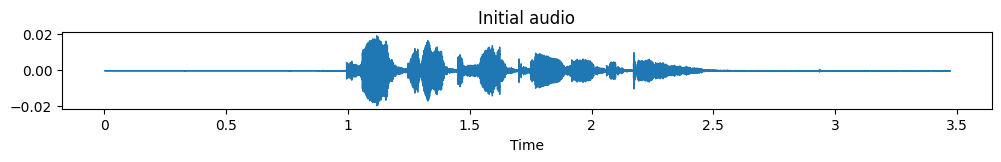

In [ ]:
# 1. Load the audio file into an 'AudioSegment' object, and extract the sample rate.
#    'x' is an array of samples that is only relevant for visualization at this part.

rawsound = AudioSegment.from_file(path)
x, sr = librosa.load(path, sr = None)

plt.figure(figsize=(12,1))
librosa.display.waveshow(x, sr = sr)
plt.title('Initial audio')

rawsound

In [ ]:
rawsound

In [ ]:
normalizedsound = effects.normalize(rawsound, headroom = 5.0)

In [ ]:
y, sr = librosa.load(path)
y

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5560643e-05,
       3.9731895e-05, 0.0000000e+00], dtype=float32)

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs

array([[-9.3318536e+02, -9.3318536e+02, -9.3318536e+02, ...,
        -9.2369458e+02, -9.2597705e+02, -9.2524005e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.1852187e+01,  9.4752474e+00,  1.0637057e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         8.4095879e+00,  7.6342888e+00,  8.9847488e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.8629488e-01, -1.0760541e+00, -6.7656255e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -7.6729262e-01, -8.2994771e-01, -4.4815058e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -4.1899848e-01, -8.5616387e-02, -2.5948364e-01]], dtype=float32)

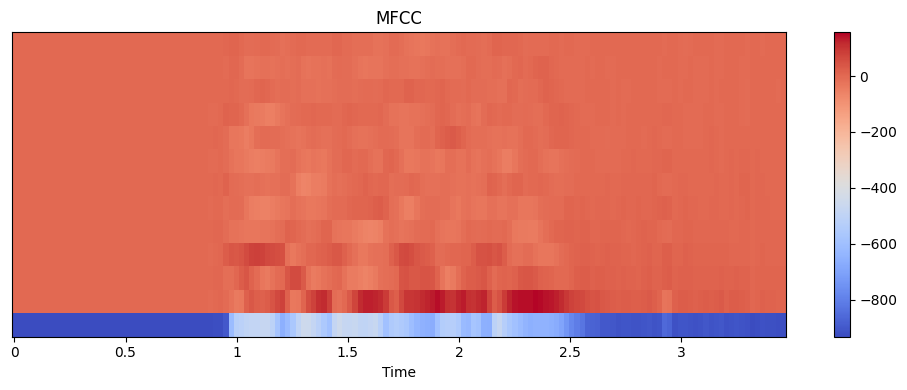

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
mfccs_scaled = scaler.fit_transform(mfccs.T)


In [ ]:
mfccs_scaled

array([[-0.93939203, -0.81874675, -0.30273622, ...,  0.29324687,
         0.6098652 ,  0.39139548],
       [-0.93939203, -0.81874675, -0.30273622, ...,  0.29324687,
         0.6098652 ,  0.39139548],
       [-0.93939203, -0.81874675, -0.30273622, ...,  0.29324687,
         0.6098652 ,  0.39139548],
       ...,
       [-0.8873506 , -0.58853   ,  0.09689496, ...,  0.24398294,
         0.5198001 ,  0.33319032],
       [-0.8998662 , -0.6346997 ,  0.06005205, ...,  0.10808582,
         0.5124456 ,  0.3795021 ],
       [-0.895825  , -0.61213267,  0.12422712, ...,  0.17682797,
         0.5572611 ,  0.35534933]], dtype=float32)

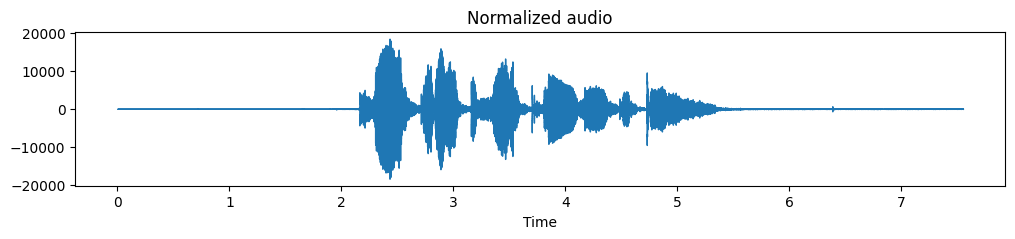

In [ ]:
# 2. Normalize to +5.0 dBFS, Transform audio signals to an array.

normalizedsound = effects.normalize(rawsound, headroom = 5.0)
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')

plt.figure(figsize=(12,2))
librosa.display.waveshow(normal_x, sr = sr)
plt.title('Normalized audio')

normalizedsound

In [ ]:
import pandas as pd

# Assuming mfccs is the array containing the MFCCs
# Convert the array to a pandas DataFrame
df_mfccs = pd.DataFrame(mfccs.T, columns=[f'MFCC_{i+1}' for i in range(mfccs.shape[0])])

# Display the DataFrame
print(df_mfccs)


         MFCC_1     MFCC_2     MFCC_3    MFCC_4    MFCC_5    MFCC_6    MFCC_7  \
0   -933.185364   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
1   -933.185364   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
2   -933.185364   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
3   -933.185364   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
4   -933.185364   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
..          ...        ...        ...       ...       ...       ...       ...   
145 -918.879883  17.179525  11.687092  7.953551  5.249273  3.312286  3.218482   
146 -923.109070  13.060053  10.235094  7.262840  5.015919  3.323005  1.753994   
147 -923.694580  11.852187   8.409588  5.295794  3.668942  3.165797  2.787955   
148 -925.977051   9.475247   7.634289  5.416527  3.538279  2.298900  1.523485   
149 -925.240051  10.637057   8.984749  6.665613  4.179628  1.986137  0.381910   

       MFCC_8    MFCC_9   M

In [ ]:
normal_x

array([ 0.,  0.,  0., ..., 28., 57., 57.], dtype=float32)

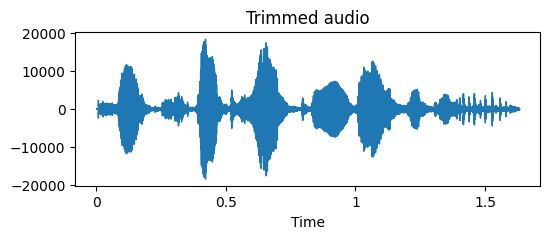

In [ ]:
# 3. Trim silence in the beginning and end.

xt, index = librosa.effects.trim(normal_x, top_db = 30)

plt.figure(figsize=(6,2))
librosa.display.waveshow(xt, sr = sr)
plt.title('Trimmed audio')

ipd.display(ipd.Audio(data = xt, rate=sr))

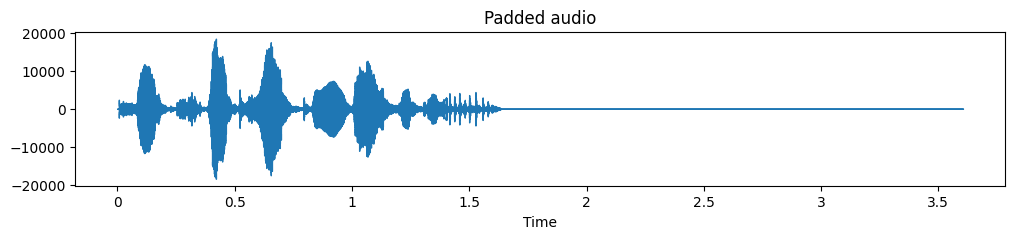

In [ ]:
# 4. Right-side padding for length equalization.
#    173056 = maximum lengthed audio (the extraction of this value is performed in the "SpeechEmotionRecognion_Model" notebook.)

padded_x = np.pad(xt, (0, 173056-len(xt)), 'constant')

plt.figure(figsize=(12,2))
librosa.display.waveshow(padded_x, sr = sr)
plt.title('Padded audio')

ipd.display(ipd.Audio(data = padded_x, rate=sr))

In [ ]:
from noisereduce import reduce_noise


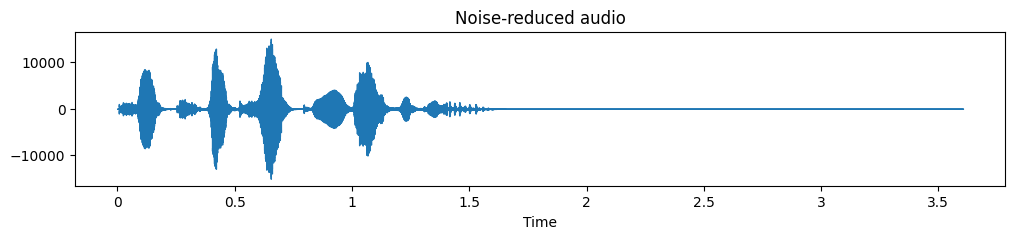

In [ ]:
final_x = nr.reduce_noise(y=padded_x, sr=sr)

plt.figure(figsize=(12,2))
librosa.display.waveshow(final_x, sr = sr)
plt.title('Noise-reduced audio')

ipd.display(ipd.Audio(data = final_x, rate=sr))

## **Features extraction for a single file**
The selected features being extracted with *librosa* for the speech emotion recognition model are:

1.   Energy - Root Mean Square (RMS)
2.   Zero Crossed Rate (ZCR)
3.   Mel-Frequency Cepstral Coefficients (MFCCs)

With frame_length = 2048, hop_lentgh = 512.

Explanation:

Every 2048 samples (sequence of ~0.058 seconds on average) are being analyzed and translated to 4 sequential feature values (2048 / 512 = 4).

In total, for an audio file lengthed 173056 samples, considering the last sample, 339 sequential values are returned for each feature  (173056+1 / 512 = 339).

In [ ]:
# Feature extraction

frame_length = 2048
hop_length = 512

f1 = librosa.feature.rms(y=final_x, frame_length=frame_length, hop_length=hop_length) # Energy - Root Mean Square (RMS)
print('Energy shape:', f1.shape)
f2 = librosa.feature.zero_crossing_rate(final_x, frame_length=frame_length, hop_length=hop_length) # Zero Crossed Rate (ZCR)
print('ZCR shape:', f2.shape)
f3 = librosa.feature.mfcc(y=final_x, sr=sr, S=None, n_mfcc=13, hop_length = hop_length) # MFCCs
print('MFCCs shape:', f3.shape)



Energy shape: (1, 339)
ZCR shape: (1, 339)
MFCCs shape: (13, 339)


In [ ]:
f3

array([[ 464.4742  ,  506.67825 ,  529.4439  , ...,  346.80722 ,
         346.80722 ,  346.80722 ],
       [ -82.62833 , -114.05529 , -127.134186, ...,    0.      ,
           0.      ,    0.      ],
       [ -53.70642 ,  -60.039948,  -67.74712 , ...,    0.      ,
           0.      ,    0.      ],
       ...,
       [ -10.152116,  -13.466902,  -15.726908, ...,    0.      ,
           0.      ,    0.      ],
       [  14.413229,   13.872347,   18.558744, ...,    0.      ,
           0.      ,    0.      ],
       [  10.244148,   12.794706,   13.405273, ...,    0.      ,
           0.      ,    0.      ]], dtype=float32)